In [31]:
#imports for our project

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import requests
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp
from geopandas import GeoDataFrame
from scipy import ndimage
import pandas as pd

In [32]:
#read real-time data output, change column names, and convert to GeoDataFrame for spatial analysis

delays = pd.read_csv('output.csv', header=None)
delays.columns = ['Date','ID','Delay','Latitude','Longitude']
delays_geo = GeoDataFrame(delays)

In [33]:
delays.head()

,Date,ID,Delay,Latitude,Longitude
0,2018-04-06 22:17:17.325912,MD-N_MN2149_V1_E,2520,42.395817,-88.181137
1,2018-04-06 22:17:17.333717,MD-N_MN2151_V1_E,1140,42.367702,-88.127213
2,2018-04-06 22:17:17.341518,UP-NW_UNW660_V1_E,120,41.909481,-87.663322
3,2018-04-06 22:17:17.348337,UP-N_UN360_V1_E,60,41.921406,-87.669930
4,2018-04-06 22:17:17.356138,MD-N_MN2158_V1_E,660,41.994236,-87.763870


In [34]:
#create GeoDataFrame for Chicago wards

wards = gp.GeoDataFrame.from_file('Boundaries - Wards (2015-)/geo_export_e0d2c9f9-461f-4c6e-b5fd-24e123c74ee3.shp')

In [35]:
#set up geometry field for delay_geo.. right now, there are only lat/longs

s = gp.GeoSeries([Point(x,y) for x, y in zip(delays_geo['Longitude'], delays_geo['Latitude'])])
delays_geo['geometry'] = s
delays_geo.crs = {'init': 'epsg:4326', 'no_defs': True}

In [36]:
#see if wards are in same bounds as delay points

delays_geo.to_crs(wards.crs, inplace=True)
delays_geo.geometry.total_bounds

array([-88.46360779,  41.55460739, -87.56613922,  42.3958168 ])

In [37]:
twelve = wards.geometry[0]
sixteen = wards.geometry[1]
fifteen = wards.geometry[2]
twenty= wards.geometry[3]
fourtynine = wards.geometry[4]
twentythree = wards.geometry[5]
twentynine = wards.geometry[6]
fourteen = wards.geometry[7]
three = wards.geometry[8]
four = wards.geometry[9]
two = wards.geometry[10]
thirtyfive = wards.geometry[11]
twentyone = wards.geometry[12]
twentyfour = wards.geometry[13]
thirteen = wards.geometry[14]
fourtyeight = wards.geometry[15]
thirtyone = wards.geometry[16]
fourtyseven = wards.geometry[17]
thirtyeight = wards.geometry[18]
thirtythree = wards.geometry[19]
thirty = wards.geometry[20]
thirtyfour = wards.geometry[21]
twentyeight = wards.geometry[22]
fourty = wards.geometry[23]
fourtyfour = wards.geometry[24]
twentyfive = wards.geometry[25]
fifty = wards.geometry[26]
twentytwo = wards.geometry[27]
fourtyone = wards.geometry[28]
eighteen = wards.geometry[29]
seventeen = wards.geometry[30]
six = wards.geometry[31]
five = wards.geometry[32]
fourtythree = wards.geometry[33]
eight = wards.geometry[34]
fourtytwo = wards.geometry[35]
seven = wards.geometry[36]
thirtynine = wards.geometry[37]
fourtysix = wards.geometry[38]
thirtytwo = wards.geometry[39]
one = wards.geometry[40]
nineteen = wards.geometry[41]
nine = wards.geometry[42]
thirtysix = wards.geometry[43]
thirtyseven = wards.geometry[44]
twentyseven = wards.geometry[45]
ten = wards.geometry[46]
eleven = wards.geometry[47]
twentysix = wards.geometry[48]
fourtyfive = wards.geometry[49]

C:\Users\Michael\Anaconda3\lib\site-packages\geopandas\plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


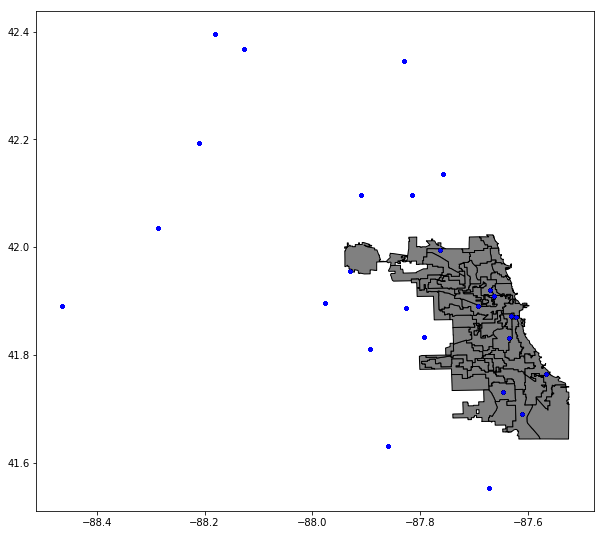

In [41]:
#overlay the points of delay with a map of Chicago

base = wards.plot(column = 'geometry', figsize = (10,10), color = 'grey', edgecolor = 'black')
delays_geo.plot(ax = base, marker='o', color='blue', markersize = 5)

In [17]:
#this method is used to create a heatmap given geometry points

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


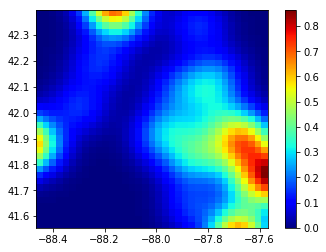

In [48]:
#create a heatmap of the Chicago Metra delays

heatmap(delays_geo['geometry'], bins = 35, smoothing = 3)

In [19]:
#this method is given a ward and returns the total number of delays and the aggregate time of delays in seconds

def sum_delays(ward):
    total = 0
    i = 0
    sum_time = 0
    while(i < len(delays_geo)):
        if(delays_geo['geometry'][i].within(ward)==True):
            total = total + 1
            sum_time = sum_time + delays_geo['Delay'][i]
        i = i+1
    return(total, sum_time)

In [20]:
#run our sum_delays method to get delay counts and delay times

one_delays, one_delays_time = sum_delays(one)
two_delays, two_delays_time = sum_delays(two)
three_delays, three_delays_time = sum_delays(three)
four_delays, four_delays_time = sum_delays(four)
five_delays, five_delays_time = sum_delays(five)
six_delays, six_delays_time = sum_delays(six)
seven_delays, seven_delays_time = sum_delays(seven)
eight_delays, eight_delays_time = sum_delays(eight)
nine_delays, nine_delays_time = sum_delays(nine)
ten_delays, ten_delays_time = sum_delays(ten)
eleven_delays, eleven_delays_time = sum_delays(eleven)
twelve_delays, twelve_delays_time = sum_delays(twelve)
thirteen_delays, thirteen_delays_time = sum_delays(thirteen)
fourteen_delays, fourteen_delays_time = sum_delays(fourteen)
fifteen_delays, fifteen_delays_time = sum_delays(fifteen)
sixteen_delays, sixteen_delays_time = sum_delays(sixteen)
seventeen_delays, seventeen_delays_time = sum_delays(seventeen)
eighteen_delays, eighteen_delays_time = sum_delays(eighteen)
nineteen_delays, nineteen_delays_time = sum_delays(nineteen)
twenty_delays, twenty_delays_time = sum_delays(twenty)
twentyone_delays, twentyone_delays_time = sum_delays(twentyone)
twentytwo_delays, twentytwo_delays_time = sum_delays(twentytwo)
twentythree_delays, twentythree_delays_time = sum_delays(twentythree)
twentyfour_delays, twentyfour_delays_time = sum_delays(twentyfour)
twentyfive_delays, twentyfive_delays_time = sum_delays(twentyfive)
twentysix_delays, twentysix_delays_time = sum_delays(twentysix)
twentyseven_delays, twentyseven_delays_time = sum_delays(twentyseven)
twentyeight_delays, twentyeight_delays_time = sum_delays(twentyeight)
twentynine_delays, twentynine_delays_time = sum_delays(twentynine)
thirty_delays, thirty_delays_time = sum_delays(thirty)
thirtyone_delays, thirtyone_delays_time = sum_delays(thirtyone)
thirtytwo_delays, thirtytwo_delays_time = sum_delays(thirtytwo)
thirtythree_delays, thirtythree_delays_time = sum_delays(thirtythree)
thirtyfour_delays, thirtyfour_delays_time = sum_delays(thirtyfour)
thirtyfive_delays, thirtyfive_delays_time = sum_delays(thirtyfive)
thirtysix_delays, thirtysix_delays_time = sum_delays(thirtysix)
thirtyseven_delays, thirtyseven_delays_time = sum_delays(thirtyseven)
thirtyeight_delays, thirtyeight_delays_time = sum_delays(thirtyeight)
thirtynine_delays, thirtynine_delays_time = sum_delays(thirtynine)
fourty_delays, fourty_delays_time = sum_delays(fourty)
fourtyone_delays, fourtyone_delays_time = sum_delays(fourtyone)
fourtytwo_delays, fourtytwo_delays_time = sum_delays(fourtytwo)
fourtythree_delays, fourtythree_delays_time = sum_delays(fourtythree)
fourtyfour_delays, fourtyfour_delays_time = sum_delays(fourtyfour)
fourtyfive_delays, fourtyfive_delays_time = sum_delays(fourtyfive)
fourtysix_delays, fourtysix_delays_time = sum_delays(fourtysix)
fourtyseven_delays, fourtyseven_delays_time = sum_delays(fourtyseven)
fourtyeight_delays, fourtyeight_delays_time = sum_delays(fourtyeight)
fourtynine_delays, fourtynine_delays_time = sum_delays(fourtynine)
fifty_delays, fifty_delays_time = sum_delays(fifty)


In [21]:
#create dictionary of wards to later convert to dataframe for analysis

wards = {'Ward':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
        'Delays':[one_delays, two_delays, three_delays, four_delays, five_delays, six_delays, seven_delays, eight_delays, nine_delays, ten_delays, eleven_delays, twelve_delays, thirteen_delays, fourteen_delays, fifteen_delays, sixteen_delays, seventeen_delays, eighteen_delays, nineteen_delays, twenty_delays, twentyone_delays, twentytwo_delays, twentythree_delays, twentyfour_delays, twentyfive_delays, twentysix_delays, twentyseven_delays, twentyeight_delays, twentynine_delays, thirty_delays, thirtyone_delays, thirtytwo_delays, thirtythree_delays, thirtyfour_delays, thirtyfive_delays, thirtysix_delays, thirtyseven_delays, thirtyeight_delays, thirtynine_delays, fourty_delays, fourtyone_delays, fourtytwo_delays, fourtythree_delays, fourtyfour_delays, fourtyfive_delays, fourtysix_delays, fourtyseven_delays, fourtyeight_delays, fourtynine_delays, fifty_delays]
        }


In [22]:
#convert dictionary to dataframe
ward_df = pd.DataFrame(wards)

In [23]:
#add delay_time to dataframe since it was acting funny when 
#we tried directly adding it to the dictionary earlier

delays_time =  [one_delays_time, two_delays_time, three_delays_time, four_delays_time, five_delays_time, six_delays_time, seven_delays_time, eight_delays_time, nine_delays_time, ten_delays_time, eleven_delays_time, twelve_delays_time, thirteen_delays_time, fourteen_delays_time, fifteen_delays_time, sixteen_delays_time, seventeen_delays_time, eighteen_delays_time, nineteen_delays_time, twenty_delays_time, twentyone_delays_time, twentytwo_delays_time, twentythree_delays_time, twentyfour_delays_time, twentyfive_delays_time, twentysix_delays_time, twentyseven_delays_time, twentyeight_delays_time, twentynine_delays_time, thirty_delays_time, thirtyone_delays_time, thirtytwo_delays_time, thirtythree_delays_time, thirtyfour_delays_time, thirtyfive_delays_time, thirtysix_delays_time, thirtyseven_delays_time, thirtyeight_delays_time, thirtynine_delays_time, fourty_delays_time, fourtyone_delays_time, fourtytwo_delays_time, fourtythree_delays_time, fourtyfour_delays_time, fourtyfive_delays_time, fourtysix_delays_time, fourtyseven_delays_time, fourtyeight_delays_time, fourtynine_delays_time, fifty_delays_time]

idx = 0
ward_df.insert(loc = idx, column = 'Delay Time', value=delays_time)

In [58]:
ward_df.head()

,Delay Time,Delays,Ward,Crime Count
0,0,0,1,4916
1,255840,2132,2,11435
2,0,0,3,6789
3,127920,4264,4,5023
4,0,0,5,6108


In [24]:
#import crime data by Chicago wards

crime_data = pd.read_csv("chicago_crimes_by_ward.csv")

In [25]:
#append instances of crime per each ward to a list and convert to a series
lst = []

for x in range(1,51):
    lst.append((crime_data.WARD==x).sum())
    
ser = pd.Series(lst)

In [26]:
#add the previously created series to the main ward dataframe

ward_df['Crime Count'] = ser.values

In [59]:
#coefficient between delay time and crime instance

ward_df['Delay Time'].corr(ward_df['Crime Count'])

-0.027503087044974103

In [27]:
#coefficient between delay instance and crime instance

ward_df['Delays'].corr(ward_df['Crime Count'])

0.15444404628535272

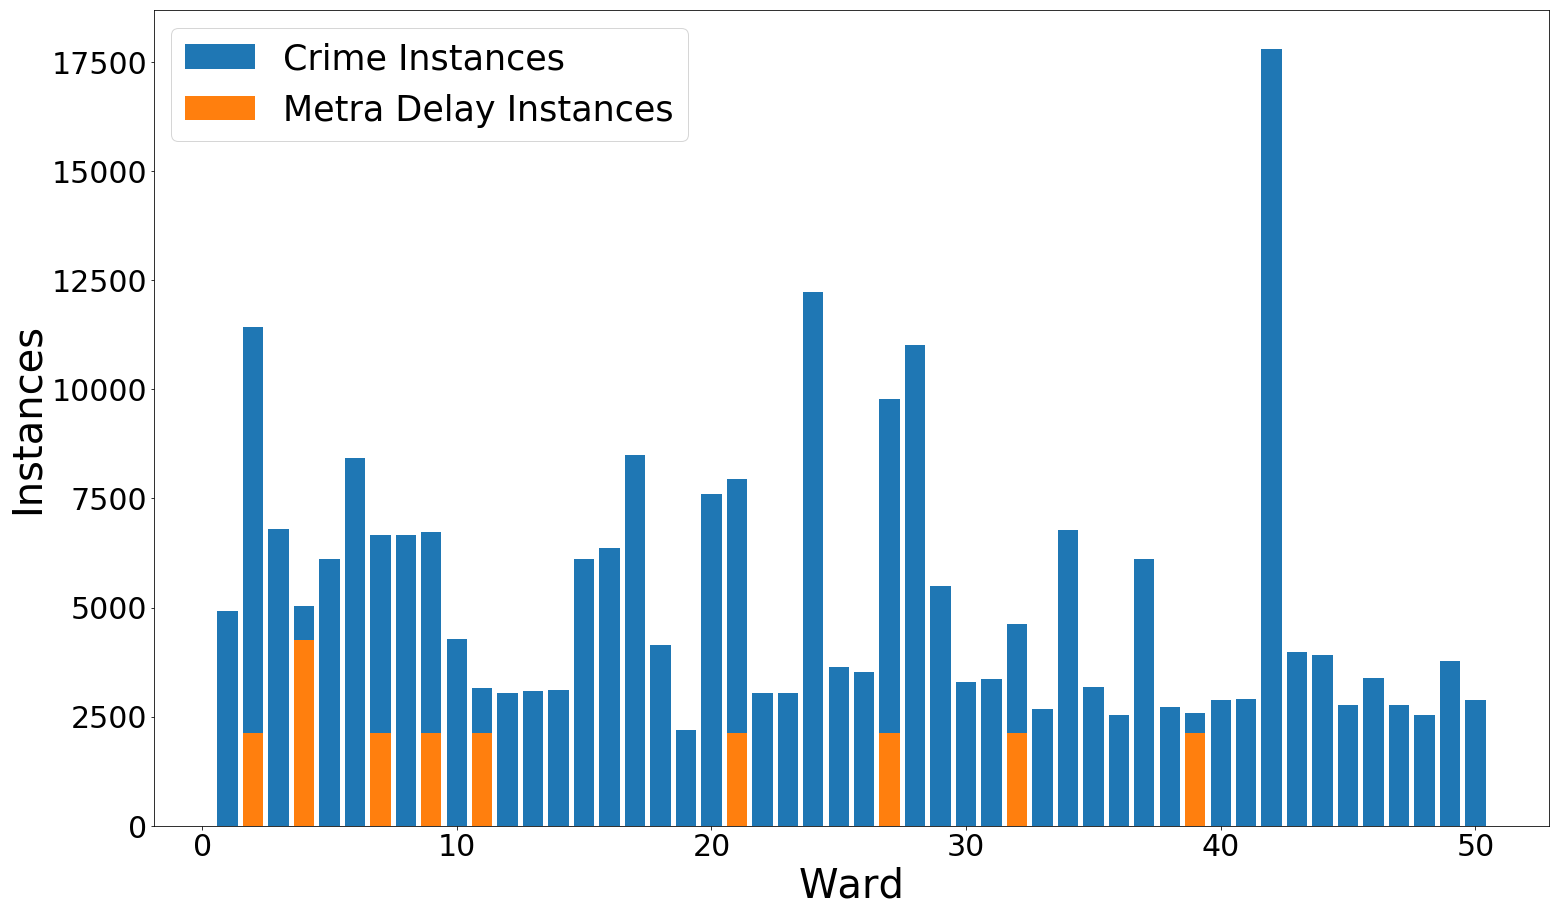

In [28]:
#create a plot comparing crime instances with metra delay instances for visualization

plt.figure(figsize = (25,15))

x = ward_df['Ward']
y1 = ward_df['Delays']
y2 = ward_df['Crime Count']

plt.bar(x, y2, label = 'Crime Instances')
plt.bar(x, y1, label ='Metra Delay Instances')
plt.legend(fontsize = 35)
plt.xlabel('Ward', fontsize = 40)
plt.ylabel('Instances', fontsize = 40)
plt.tick_params(labelsize = 30)
plt.savefig('Ward Analysis.jpg')